In [1]:
import pandas as pd
import numpy as np

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [4]:
GBD_country_group = pd.read_excel(r'/Users/kediliukl/surfdrive/Documents/CML research/IIASA-YSSP/Liu_et_al_code_and_dataset /Code&Data for results/Data/Country Match/GBD_country_iso_codes.xlsx',sheet_name='Sheet4')

GBD_country_group

,Country,Region,GBD Region,Global,iso_code
0,Afghanistan,North Africa and Middle East,North Africa and Middle East,Global,AFG
1,Albania,Central Europe,"Central Europe, eastern Europe, and central Asia",Global,ALB
2,Algeria,North Africa and Middle East,North Africa and Middle East,Global,DZA
3,American Samoa,Oceania,"Southeast Asia, east Asia, and Oceania",Global,ASM
4,Andorra,Western Europe,High income,Global,AND
...,...,...,...,...,...
199,Viet Nam,Southeast Asia,"Southeast Asia, east Asia, and Oceania",Global,VNM
200,Virgin Islands,Caribbean,Latin America and Caribbean,Global,VIR
201,Yemen,North Africa and Middle East,North Africa and Middle East,Global,YEM
202,Zambia,Eastern sub- Saharan Africa,Sub-Saharan Africa,Global,ZMB


In [48]:
GBD_country_group[GBD_country_group['iso_code'] == 'BGD']

,Country,Region,GBD Region,Global,iso_code
13,Bangladesh,South Asia,South Asia,Global,BGD


In [5]:
change_cumu_deaths_fill = pd.read_csv('/Users/kediliukl/surfdrive/Documents/CML research/IIASA-YSSP/Liu_et_al_code_and_dataset /Code&Data for results/Data/Health outcomes/Premature Deaths/change_cumu_deaths_fill.csv').replace({'Scenario': {'ssp119': 'SSP1-1.9', 'ssp126': 'SSP1-2.6', 'ssp245': 'SSP2-4.5', 'ssp370': 'SSP3-7.0'}})

change_cumu_deaths_fill

,SSPs,Year,sex,iso_code,age,mx,Scenario,Population,COP_delta_mort_AVG_adjusted,COP_delta_mort_LOW_adjusted,...,LUN_delta_mort_HIGH_diff,STR_delta_mort_AVG_diff,STR_delta_mort_LOW_diff,STR_delta_mort_HIGH_diff,TDM_delta_mort_AVG_diff,TDM_delta_mort_LOW_diff,TDM_delta_mort_HIGH_diff,total_delta_mort_AVG_diff,total_delta_mort_LOW_diff,total_delta_mort_HIGH_diff
0,SSP1,2020,f,AFG,0.0,0.011760,SSP1-1.9,3087.40,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,SSP1,2021,f,AFG,0.0,0.011089,SSP1-1.9,3101.88,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.002506,-0.000021,-0.007346
2,SSP1,2022,f,AFG,0.0,0.010417,SSP1-1.9,3116.36,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.005012,-0.000041,-0.014692
3,SSP1,2023,f,AFG,0.0,0.009746,SSP1-1.9,3130.84,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.007518,-0.000062,-0.022039
4,SSP1,2024,f,AFG,0.0,0.009074,SSP1-1.9,3145.32,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.010024,-0.000083,-0.029385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972211,SSP3,2046,m,ZWE,100.0,0.482033,SSP3-7.0,0.10,0.000053,0.000036,...,1.458089e-07,0.000003,0.000002,0.000005,0.000002,5.125166e-07,0.000003,0.000057,0.000006,0.000157
972212,SSP3,2047,m,ZWE,100.0,0.481921,SSP3-7.0,0.10,0.000054,0.000037,...,1.441616e-07,0.000003,0.000002,0.000005,0.000001,4.958434e-07,0.000003,0.000056,0.000006,0.000153
972213,SSP3,2048,m,ZWE,100.0,0.481810,SSP3-7.0,0.10,0.000055,0.000038,...,1.425144e-07,0.000003,0.000002,0.000004,0.000001,4.791702e-07,0.000003,0.000054,0.000006,0.000149
972214,SSP3,2049,m,ZWE,100.0,0.481698,SSP3-7.0,0.10,0.000057,0.000039,...,1.408672e-07,0.000003,0.000002,0.000004,0.000001,4.624970e-07,0.000003,0.000053,0.000005,0.000145


# death rate for each age group/region/disease - aggregated for both sexes

## regional adjusted death rate - with PM2.5 feedbacks

In [6]:
death_rate_adjusted = change_cumu_deaths_fill.merge(GBD_country_group, on='iso_code', how='left')

age_bins = [-1, 24, 64, float('inf')]
age_labels = ['Under 25', '25-64', '65+']
death_rate_adjusted['age_group'] = pd.cut(death_rate_adjusted['age'], bins=age_bins, labels=age_labels)

diseases = ['COP', 'IHD', 'LRI', 'LUN', 'STR', 'TDM']
melt_cols_adjusted = [f'{d}_delta_mort_AVG_adjusted' for d in diseases]

melted_df_adjusted = pd.melt(
    death_rate_adjusted,
    id_vars=[col for col in death_rate_adjusted.columns if col not in melt_cols_adjusted],
    value_vars=melt_cols_adjusted,
    var_name='Disease',
    value_name='Delta_Mortality_AVG'
)

melted_df_adjusted['Disease'] = melted_df_adjusted['Disease'].str.replace('_delta_mort_AVG_adjusted', '')

death_rate_adjusted = melted_df_adjusted[[
    'Scenario', 'Year', 'sex', 'iso_code', 'age', 'age_group',
    'Population', 'GBD Region', 'Disease', 'Delta_Mortality_AVG'
]]

death_rate_adjusted['death_rate_adjusted'] = np.where(
    (death_rate_adjusted['Delta_Mortality_AVG'] == 0) & (death_rate_adjusted['Population'] == 0),
    0,
    death_rate_adjusted['Delta_Mortality_AVG'] / death_rate_adjusted['Population'] * 1e5
)

death_rate_adjusted_both = (
    death_rate_adjusted.groupby(['Scenario', 'age_group', 'GBD Region', 'Disease', 'Year'], as_index=False)
.apply(
        lambda group: pd.Series({
            'weighted_death_rate_adjusted': (group['death_rate_adjusted'] * group['Population']).sum() / group['Population'].sum()
        })
    )
    .reset_index()
)

death_rate_adjusted_both = (
    death_rate_adjusted_both.groupby(['Scenario', 'age_group', 'GBD Region', 'Disease'], as_index=False)
    .agg(weighted_death_rate_adjusted=('weighted_death_rate_adjusted', 'mean'))
)

region_map = {
    'Central Europe, eastern Europe, and central Asia': 'CEEUCA',
    'High income': 'HIC',
    'Latin America and Caribbean': 'LAC',
    'North Africa and Middle East': 'NAME',
    'South Asia': 'SA',
    'Southeast Asia, east Asia, and Oceania': 'SEAO',
    'Sub-Saharan Africa': 'SSA'
}
death_rate_adjusted_both['GBD Region'] = death_rate_adjusted_both['GBD Region'].replace(region_map)

disease_map = {
    'COP': 'COPD',
    'LUN': 'Lung cancer',
    'TDM': 'Type 2 diabetes',
    'STR': 'Stroke'
}

death_rate_adjusted_both['Disease'] = death_rate_adjusted_both['Disease'].replace(disease_map)

death_rate_adjusted_both



/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/1654032426.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_rate_adjusted['death_rate_adjusted'] = np.where(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/1654032426.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate_adjusted.groupby(['Scenario', 'age_group', 'GBD Region', 'Disease', 'Year'], as_index=False)
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/1654032426.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the group

,Scenario,age_group,GBD Region,Disease,weighted_death_rate_adjusted
0,SSP1-1.9,Under 25,CEEUCA,COPD,0.000000
1,SSP1-1.9,Under 25,CEEUCA,IHD,0.000000
2,SSP1-1.9,Under 25,CEEUCA,LRI,0.626882
3,SSP1-1.9,Under 25,CEEUCA,Lung cancer,0.000000
4,SSP1-1.9,Under 25,CEEUCA,Stroke,0.000000
...,...,...,...,...,...
499,SSP3-7.0,65+,SSA,IHD,172.531126
500,SSP3-7.0,65+,SSA,LRI,118.904690
501,SSP3-7.0,65+,SSA,Lung cancer,9.313079
502,SSP3-7.0,65+,SSA,Stroke,174.336013


In [63]:
death_rate_adjusted_both[(death_rate_adjusted_both['GBD Region']=='SA')].sort_values(by=['Scenario','weighted_death_rate_adjusted'])[50:72]#[454:504]#

,Scenario,age_group,GBD Region,Disease,weighted_death_rate_adjusted
362,SSP2-4.5,65+,SA,LRI,72.443981
364,SSP2-4.5,65+,SA,Stroke,185.295185
361,SSP2-4.5,65+,SA,IHD,332.144122
360,SSP2-4.5,65+,SA,COPD,355.060653
402,SSP3-7.0,Under 25,SA,COPD,0.000000
403,SSP3-7.0,Under 25,SA,IHD,0.000000
405,SSP3-7.0,Under 25,SA,Lung cancer,0.000000
406,SSP3-7.0,Under 25,SA,Stroke,0.000000
407,SSP3-7.0,Under 25,SA,Type 2 diabetes,0.000000
447,SSP3-7.0,25-64,SA,Lung cancer,2.518176


In [66]:
death_rate_adjusted_both[(death_rate_adjusted_both['GBD Region']=='SEAO')].sort_values(by=['Scenario','weighted_death_rate_adjusted'])

,Scenario,age_group,GBD Region,Disease,weighted_death_rate_adjusted
30,SSP1-1.9,Under 25,SEAO,COPD,0.000000
31,SSP1-1.9,Under 25,SEAO,IHD,0.000000
33,SSP1-1.9,Under 25,SEAO,Lung cancer,0.000000
34,SSP1-1.9,Under 25,SEAO,Stroke,0.000000
35,SSP1-1.9,Under 25,SEAO,Type 2 diabetes,0.000000
...,...,...,...,...,...
494,SSP3-7.0,65+,SEAO,LRI,34.992966
495,SSP3-7.0,65+,SEAO,Lung cancer,64.712046
492,SSP3-7.0,65+,SEAO,COPD,165.409290
493,SSP3-7.0,65+,SEAO,IHD,193.981171


In [67]:
death_rate_adjusted_both[(death_rate_adjusted_both['GBD Region']=='SSA')].sort_values(by=['Scenario','weighted_death_rate_adjusted'])

,Scenario,age_group,GBD Region,Disease,weighted_death_rate_adjusted
36,SSP1-1.9,Under 25,SSA,COPD,0.000000
37,SSP1-1.9,Under 25,SSA,IHD,0.000000
39,SSP1-1.9,Under 25,SSA,Lung cancer,0.000000
40,SSP1-1.9,Under 25,SSA,Stroke,0.000000
41,SSP1-1.9,Under 25,SSA,Type 2 diabetes,0.000000
...,...,...,...,...,...
498,SSP3-7.0,65+,SSA,COPD,50.592149
503,SSP3-7.0,65+,SSA,Type 2 diabetes,60.409483
500,SSP3-7.0,65+,SSA,LRI,118.904690
499,SSP3-7.0,65+,SSA,IHD,172.531126


In [68]:
death_rate_adjusted_both[(death_rate_adjusted_both['GBD Region']=='NAME')].sort_values(by=['Scenario','weighted_death_rate_adjusted'])

,Scenario,age_group,GBD Region,Disease,weighted_death_rate_adjusted
18,SSP1-1.9,Under 25,NAME,COPD,0.000000
19,SSP1-1.9,Under 25,NAME,IHD,0.000000
21,SSP1-1.9,Under 25,NAME,Lung cancer,0.000000
22,SSP1-1.9,Under 25,NAME,Stroke,0.000000
23,SSP1-1.9,Under 25,NAME,Type 2 diabetes,0.000000
...,...,...,...,...,...
482,SSP3-7.0,65+,NAME,LRI,31.815564
480,SSP3-7.0,65+,NAME,COPD,38.563856
485,SSP3-7.0,65+,NAME,Type 2 diabetes,41.775576
484,SSP3-7.0,65+,NAME,Stroke,115.239856


In [69]:
death_rate_adjusted_both[(death_rate_adjusted_both['GBD Region']=='CEEUCA')].sort_values(by=['Scenario','weighted_death_rate_adjusted'])

,Scenario,age_group,GBD Region,Disease,weighted_death_rate_adjusted
0,SSP1-1.9,Under 25,CEEUCA,COPD,0.000000
1,SSP1-1.9,Under 25,CEEUCA,IHD,0.000000
3,SSP1-1.9,Under 25,CEEUCA,Lung cancer,0.000000
4,SSP1-1.9,Under 25,CEEUCA,Stroke,0.000000
5,SSP1-1.9,Under 25,CEEUCA,Type 2 diabetes,0.000000
...,...,...,...,...,...
462,SSP3-7.0,65+,CEEUCA,COPD,6.883658
465,SSP3-7.0,65+,CEEUCA,Lung cancer,7.278687
467,SSP3-7.0,65+,CEEUCA,Type 2 diabetes,7.651119
466,SSP3-7.0,65+,CEEUCA,Stroke,31.777787


In [70]:
death_rate_adjusted_both[(death_rate_adjusted_both['GBD Region']=='HIC')].sort_values(by=['Scenario','weighted_death_rate_adjusted'])

,Scenario,age_group,GBD Region,Disease,weighted_death_rate_adjusted
6,SSP1-1.9,Under 25,HIC,COPD,0.000000
7,SSP1-1.9,Under 25,HIC,IHD,0.000000
9,SSP1-1.9,Under 25,HIC,Lung cancer,0.000000
10,SSP1-1.9,Under 25,HIC,Stroke,0.000000
11,SSP1-1.9,Under 25,HIC,Type 2 diabetes,0.000000
...,...,...,...,...,...
468,SSP3-7.0,65+,HIC,COPD,9.433774
471,SSP3-7.0,65+,HIC,Lung cancer,9.818424
472,SSP3-7.0,65+,HIC,Stroke,12.789610
470,SSP3-7.0,65+,HIC,LRI,14.800757


In [71]:
death_rate_adjusted_both[(death_rate_adjusted_both['GBD Region']=='LAC')].sort_values(by=['Scenario','weighted_death_rate_adjusted'])

,Scenario,age_group,GBD Region,Disease,weighted_death_rate_adjusted
12,SSP1-1.9,Under 25,LAC,COPD,0.000000
13,SSP1-1.9,Under 25,LAC,IHD,0.000000
15,SSP1-1.9,Under 25,LAC,Lung cancer,0.000000
16,SSP1-1.9,Under 25,LAC,Stroke,0.000000
17,SSP1-1.9,Under 25,LAC,Type 2 diabetes,0.000000
...,...,...,...,...,...
474,SSP3-7.0,65+,LAC,COPD,30.897775
478,SSP3-7.0,65+,LAC,Stroke,36.436737
479,SSP3-7.0,65+,LAC,Type 2 diabetes,41.687843
476,SSP3-7.0,65+,LAC,LRI,42.262540


In [72]:
death_rate_adjusted_both[(death_rate_adjusted_both['Scenario']=='SSP3-7.0')&(death_rate_adjusted_both['age_group']=='65+')].groupby(['GBD Region'], group_keys=False).apply(lambda x: x.nlargest(3, 'weighted_death_rate_adjusted'))


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/1778225623.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  death_rate_adjusted_both[(death_rate_adjusted_both['Scenario']=='SSP3-7.0')&(death_rate_adjusted_both['age_group']=='65+')].groupby(['GBD Region'], group_keys=False).apply(lambda x: x.nlargest(3, 'weighted_death_rate_adjusted'))


,Scenario,age_group,GBD Region,Disease,weighted_death_rate_adjusted
463,SSP3-7.0,65+,CEEUCA,IHD,107.517441
466,SSP3-7.0,65+,CEEUCA,Stroke,31.777787
467,SSP3-7.0,65+,CEEUCA,Type 2 diabetes,7.651119
469,SSP3-7.0,65+,HIC,IHD,22.309554
470,SSP3-7.0,65+,HIC,LRI,14.800757
472,SSP3-7.0,65+,HIC,Stroke,12.789610
475,SSP3-7.0,65+,LAC,IHD,87.968813
476,SSP3-7.0,65+,LAC,LRI,42.262540
479,SSP3-7.0,65+,LAC,Type 2 diabetes,41.687843
481,SSP3-7.0,65+,NAME,IHD,290.775479


In [73]:
death_rate_adjusted_both[(death_rate_adjusted_both['Scenario']=='SSP1-1.9')&(death_rate_adjusted_both['age_group']=='65+')].groupby(['GBD Region'], group_keys=False).apply(lambda x: x.nlargest(3, 'weighted_death_rate_adjusted'))


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/3056525601.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  death_rate_adjusted_both[(death_rate_adjusted_both['Scenario']=='SSP1-1.9')&(death_rate_adjusted_both['age_group']=='65+')].groupby(['GBD Region'], group_keys=False).apply(lambda x: x.nlargest(3, 'weighted_death_rate_adjusted'))


,Scenario,age_group,GBD Region,Disease,weighted_death_rate_adjusted
85,SSP1-1.9,65+,CEEUCA,IHD,55.389335
88,SSP1-1.9,65+,CEEUCA,Stroke,16.282548
89,SSP1-1.9,65+,CEEUCA,Type 2 diabetes,3.616623
91,SSP1-1.9,65+,HIC,IHD,10.239940
92,SSP1-1.9,65+,HIC,LRI,7.193280
94,SSP1-1.9,65+,HIC,Stroke,5.543869
97,SSP1-1.9,65+,LAC,IHD,58.234078
98,SSP1-1.9,65+,LAC,LRI,28.747479
101,SSP1-1.9,65+,LAC,Type 2 diabetes,27.078217
103,SSP1-1.9,65+,NAME,IHD,191.008893


In [75]:
death_rate_adjusted_both[(death_rate_adjusted_both['Scenario']=='SSP1-2.6')&(death_rate_adjusted_both['age_group']=='65+')].groupby(['GBD Region'], group_keys=False).apply(lambda x: x.nlargest(3, 'weighted_death_rate_adjusted'))


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/1735502135.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  death_rate_adjusted_both[(death_rate_adjusted_both['Scenario']=='SSP1-2.6')&(death_rate_adjusted_both['age_group']=='65+')].groupby(['GBD Region'], group_keys=False).apply(lambda x: x.nlargest(3, 'weighted_death_rate_adjusted'))


,Scenario,age_group,GBD Region,Disease,weighted_death_rate_adjusted
211,SSP1-2.6,65+,CEEUCA,IHD,59.967915
214,SSP1-2.6,65+,CEEUCA,Stroke,17.495417
215,SSP1-2.6,65+,CEEUCA,Type 2 diabetes,3.925151
217,SSP1-2.6,65+,HIC,IHD,10.787530
218,SSP1-2.6,65+,HIC,LRI,7.025898
220,SSP1-2.6,65+,HIC,Stroke,5.821319
223,SSP1-2.6,65+,LAC,IHD,57.744408
224,SSP1-2.6,65+,LAC,LRI,27.820508
227,SSP1-2.6,65+,LAC,Type 2 diabetes,26.926409
229,SSP1-2.6,65+,NAME,IHD,202.850336


In [76]:
death_rate_adjusted_both[(death_rate_adjusted_both['Scenario']=='SSP2-4.5')&(death_rate_adjusted_both['age_group']=='65+')].groupby(['GBD Region'], group_keys=False).apply(lambda x: x.nlargest(3, 'weighted_death_rate_adjusted'))


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/1168294314.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  death_rate_adjusted_both[(death_rate_adjusted_both['Scenario']=='SSP2-4.5')&(death_rate_adjusted_both['age_group']=='65+')].groupby(['GBD Region'], group_keys=False).apply(lambda x: x.nlargest(3, 'weighted_death_rate_adjusted'))


,Scenario,age_group,GBD Region,Disease,weighted_death_rate_adjusted
337,SSP2-4.5,65+,CEEUCA,IHD,84.008397
340,SSP2-4.5,65+,CEEUCA,Stroke,24.083194
341,SSP2-4.5,65+,CEEUCA,Type 2 diabetes,5.359962
343,SSP2-4.5,65+,HIC,IHD,15.116763
344,SSP2-4.5,65+,HIC,LRI,9.936746
346,SSP2-4.5,65+,HIC,Stroke,8.279174
349,SSP2-4.5,65+,LAC,IHD,71.215800
350,SSP2-4.5,65+,LAC,LRI,34.353493
353,SSP2-4.5,65+,LAC,Type 2 diabetes,33.704270
355,SSP2-4.5,65+,NAME,IHD,231.245066


In [77]:
death_rate_adjusted_both[(death_rate_adjusted_both['Scenario']=='SSP2-4.5')&(death_rate_adjusted_both['GBD Region']=='SEAO')]#.groupby(['GBD Region'], group_keys=False).apply(lambda x: x.nlargest(3, 'weighted_death_rate_adjusted'))


,Scenario,age_group,GBD Region,Disease,weighted_death_rate_adjusted
282,SSP2-4.5,Under 25,SEAO,COPD,0.000000
283,SSP2-4.5,Under 25,SEAO,IHD,0.000000
284,SSP2-4.5,Under 25,SEAO,LRI,0.917670
285,SSP2-4.5,Under 25,SEAO,Lung cancer,0.000000
286,SSP2-4.5,Under 25,SEAO,Stroke,0.000000
287,SSP2-4.5,Under 25,SEAO,Type 2 diabetes,0.000000
324,SSP2-4.5,25-64,SEAO,COPD,2.010493
325,SSP2-4.5,25-64,SEAO,IHD,6.545168
326,SSP2-4.5,25-64,SEAO,LRI,0.871562
327,SSP2-4.5,25-64,SEAO,Lung cancer,3.813053


## change in regional death rate - with&without PM2.5 feedbacks

In [14]:
death_rate = change_cumu_deaths_fill.merge(GBD_country_group, on='iso_code', how='left')

age_bins = [-1, 24, 64, float('inf')]
age_labels = ['Under 25', '25-64', '65+']
death_rate['age_group'] = pd.cut(death_rate['age'], bins=age_bins, labels=age_labels)

diseases = ['COP', 'IHD', 'LRI', 'LUN', 'STR', 'TDM']
melt_cols_diff = [f'{d}_delta_mort_AVG_diff' for d in diseases]

melted_df_diff = pd.melt(
    death_rate,
    id_vars=[col for col in death_rate.columns if col not in melt_cols_diff],
    value_vars=melt_cols_diff,
    var_name='Disease',
    value_name='Delta_Mortality_Diff_AVG'
)

melted_df_diff['Disease'] = melted_df_diff['Disease'].str.replace('_delta_mort_AVG_diff', '')

death_rate_diff = melted_df_diff[[
    'Scenario', 'Year', 'sex', 'iso_code', 'age', 'age_group',
    'Population', 'GBD Region', 'Disease', 'Delta_Mortality_Diff_AVG'
]]

death_rate_diff['death_rate_diff'] = np.where(
    (death_rate_diff['Delta_Mortality_Diff_AVG'] == 0) & (death_rate_diff['Population'] == 0),
    0,
    death_rate_diff['Delta_Mortality_Diff_AVG'] / death_rate_diff['Population'] * 1e5
)

death_rate_diff_both = (
    death_rate_diff.groupby(['Scenario', 'age_group', 'GBD Region', 'Disease', 'Year'], as_index=False)
.apply(
        lambda group: pd.Series({
            'weighted_death_rate_diff': (group['death_rate_diff'] * group['Population']).sum() / group['Population'].sum()
        })
    )
    .reset_index()
)

death_rate_diff_both = (
    death_rate_diff_both.groupby(['Scenario', 'age_group', 'GBD Region', 'Disease'], as_index=False)
    .agg(weighted_death_rate_diff=('weighted_death_rate_diff', 'mean'))
)

region_map = {
    'Central Europe, eastern Europe, and central Asia': 'CEEUCA',
    'High income': 'HIC',
    'Latin America and Caribbean': 'LAC',
    'North Africa and Middle East': 'NAME',
    'South Asia': 'SA',
    'Southeast Asia, east Asia, and Oceania': 'SEAO',
    'Sub-Saharan Africa': 'SSA'
}
death_rate_diff_both['GBD Region'] = death_rate_diff_both['GBD Region'].replace(region_map)

disease_map = {
    'COP': 'COPD',
    'LUN': 'Lung cancer',
    'TDM': 'Type 2 diabetes',
    'STR': 'Stroke'
}

death_rate_diff_both['Disease'] = death_rate_diff_both['Disease'].replace(disease_map)

death_rate_diff_both

/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/25810713.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_rate_diff['death_rate_diff'] = np.where(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/25810713.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate_diff.groupby(['Scenario', 'age_group', 'GBD Region', 'Disease', 'Year'], as_index=False)
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/25810713.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This 

,Scenario,age_group,GBD Region,Disease,weighted_death_rate_diff
0,SSP1-1.9,Under 25,CEEUCA,COPD,0.000000
1,SSP1-1.9,Under 25,CEEUCA,IHD,0.000000
2,SSP1-1.9,Under 25,CEEUCA,LRI,-0.008069
3,SSP1-1.9,Under 25,CEEUCA,Lung cancer,0.000000
4,SSP1-1.9,Under 25,CEEUCA,Stroke,0.000000
...,...,...,...,...,...
499,SSP3-7.0,65+,SSA,IHD,1.140220
500,SSP3-7.0,65+,SSA,LRI,0.393238
501,SSP3-7.0,65+,SSA,Lung cancer,0.027388
502,SSP3-7.0,65+,SSA,Stroke,1.297290


In [41]:
death_rate_diff_both.sort_values('weighted_death_rate_diff', ascending=False)

,Scenario,age_group,GBD Region,Disease,weighted_death_rate_diff
486,SSP3-7.0,65+,SA,COPD,47.821253
492,SSP3-7.0,65+,SEAO,COPD,16.178208
493,SSP3-7.0,65+,SEAO,IHD,15.098150
496,SSP3-7.0,65+,SEAO,Stroke,14.737379
487,SSP3-7.0,65+,SA,IHD,12.357444
...,...,...,...,...,...
112,SSP1-1.9,65+,SA,Stroke,-15.712137
235,SSP1-2.6,65+,SA,IHD,-22.383105
109,SSP1-1.9,65+,SA,IHD,-28.958492
234,SSP1-2.6,65+,SA,COPD,-39.348393


## country level adjusted death rate aggregated for both sexes and six PM2.5 related diseases

In [13]:

death_rate_adjusted_iso = melted_df_adjusted[[
    'Scenario', 'Year', 'sex', 'iso_code', 'age', 'age_group',
    'Population', 'Disease', 'Delta_Mortality_AVG'
]]

death_rate_adjusted_iso['death_rate_adjusted'] = np.where(
    (death_rate_adjusted_iso['Delta_Mortality_AVG'] == 0) & (death_rate_adjusted_iso['Population'] == 0),
    0,
    death_rate_adjusted_iso['Delta_Mortality_AVG'] / death_rate_adjusted_iso['Population'] * 1e5
)

death_rate_adjusted_iso_both = (
    death_rate_adjusted_iso.groupby(['Scenario', 'age_group', 'iso_code', 'Disease', 'Year'], as_index=False)
.apply(
        lambda group: pd.Series({
            'weighted_death_rate_adjusted': (group['death_rate_adjusted'] * group['Population']).sum() / group['Population'].sum()
        })
    )
    .reset_index()
)

death_rate_adjusted_iso_both = (
    death_rate_adjusted_iso_both.groupby(['Scenario', 'age_group', 'iso_code', 'Disease'], as_index=False)
    .agg(weighted_death_rate_adjusted=('weighted_death_rate_adjusted', 'mean'))
)

death_rate_adjusted_iso_both = (
    death_rate_adjusted_iso_both.groupby(['Scenario', 'age_group', 'iso_code'], as_index=False)
    .agg(weighted_death_rate_adjusted=('weighted_death_rate_adjusted', 'sum'))
)

death_rate_adjusted_iso_both


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/1647469041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_rate_adjusted_iso['death_rate_adjusted'] = np.where(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/1647469041.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate_adjusted_iso.groupby(['Scenario', 'age_group', 'iso_code', 'Disease', 'Year'], as_index=False)
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/1647469041.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the 

,Scenario,age_group,iso_code,weighted_death_rate_adjusted
0,SSP1-1.9,Under 25,AFG,2.075425
1,SSP1-1.9,Under 25,AGO,2.795527
2,SSP1-1.9,Under 25,ALB,0.105964
3,SSP1-1.9,Under 25,ARE,0.261694
4,SSP1-1.9,Under 25,ARG,0.332491
...,...,...,...,...
2227,SSP3-7.0,65+,WSM,192.698303
2228,SSP3-7.0,65+,YEM,946.649894
2229,SSP3-7.0,65+,ZAF,211.403519
2230,SSP3-7.0,65+,ZMB,236.711692


In [38]:
death_rate_adjusted_iso_both.groupby('Scenario', group_keys=False).apply(lambda x: x.nlargest(5, 'weighted_death_rate_adjusted'))

/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/2826199023.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  death_rate_adjusted_iso_both.groupby('Scenario', group_keys=False).apply(lambda x: x.nlargest(5, 'weighted_death_rate_adjusted'))


,Scenario,age_group,iso_code,weighted_death_rate_adjusted
536,SSP1-1.9,65+,TKM,1034.971504
532,SSP1-1.9,65+,TCD,1034.799589
491,SSP1-1.9,65+,NER,1008.062333
515,SSP1-1.9,65+,SDN,852.728800
492,SSP1-1.9,65+,NGA,849.177619
1090,SSP1-2.6,65+,TCD,1027.528628
1094,SSP1-2.6,65+,TKM,998.116599
1049,SSP1-2.6,65+,NER,976.177887
993,SSP1-2.6,65+,GMB,912.114269
1044,SSP1-2.6,65+,MRT,869.451453


##  change in country level death rate aggregated for both sexes and six PM2.5 related diseases

In [15]:
death_rate_diff_iso = melted_df_diff[[
    'Scenario', 'Year', 'sex', 'iso_code', 'age', 'age_group',
    'Population', 'Disease', 'Delta_Mortality_Diff_AVG'
]]

death_rate_diff_iso['death_rate_diff'] = np.where(
    (death_rate_diff_iso['Delta_Mortality_Diff_AVG'] == 0) & (death_rate_diff_iso['Population'] == 0),
    0,
    death_rate_diff_iso['Delta_Mortality_Diff_AVG'] / death_rate_diff_iso['Population'] * 1e5
)

death_rate_diff_iso_both = (
    death_rate_diff_iso.groupby(['Scenario', 'age_group', 'iso_code', 'Disease', 'Year'], as_index=False)
.apply(
        lambda group: pd.Series({
            'weighted_death_rate_diff': (group['death_rate_diff'] * group['Population']).sum() / group['Population'].sum()
        })
    )
    .reset_index()
)

death_rate_diff_iso_both = (
    death_rate_diff_iso_both.groupby(['Scenario', 'age_group', 'iso_code', 'Disease'], as_index=False)
    .agg(weighted_death_rate_diff=('weighted_death_rate_diff', 'mean'))
)

death_rate_diff_iso_both = (
    death_rate_diff_iso_both.groupby(['Scenario', 'age_group', 'iso_code'], as_index=False)
    .agg(weighted_death_rate_diff=('weighted_death_rate_diff', 'sum'))
)

death_rate_diff_iso_both


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/3710786803.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_rate_diff_iso['death_rate_diff'] = np.where(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/3710786803.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate_diff_iso.groupby(['Scenario', 'age_group', 'iso_code', 'Disease', 'Year'], as_index=False)
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38512/3710786803.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping col

,Scenario,age_group,iso_code,weighted_death_rate_diff
0,SSP1-1.9,Under 25,AFG,-0.053297
1,SSP1-1.9,Under 25,AGO,-0.000314
2,SSP1-1.9,Under 25,ALB,-0.000987
3,SSP1-1.9,Under 25,ARE,-0.004756
4,SSP1-1.9,Under 25,ARG,0.024788
...,...,...,...,...
2227,SSP3-7.0,65+,WSM,0.560690
2228,SSP3-7.0,65+,YEM,30.946093
2229,SSP3-7.0,65+,ZAF,1.780799
2230,SSP3-7.0,65+,ZMB,-0.113077


In [49]:
death_rate_diff_iso_both.sort_values(by='weighted_death_rate_diff', ascending=False)[0:50]

,Scenario,age_group,iso_code,weighted_death_rate_diff
2060,SSP3-7.0,65+,BGD,88.430482
2170,SSP3-7.0,65+,NPL,86.406207
2122,SSP3-7.0,65+,IND,72.668220
2173,SSP3-7.0,65+,PAK,70.806571
2210,SSP3-7.0,65+,TKM,63.137061
2077,SSP3-7.0,65+,CHN,62.639082
2225,SSP3-7.0,65+,VNM,56.307829
2139,SSP3-7.0,65+,LAO,49.718761
2180,SSP3-7.0,65+,PRK,43.859769
2214,SSP3-7.0,65+,TUN,39.917312


In [ ]:
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")


world = world.rename(columns={'ADM0_A3': 'iso_code'})

def plot_global_map(df, title, ax=None):

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': ccrs.Robinson()})
    else:
        fig = ax.figure
    
    cmap_mx = plt.cm.coolwarm
    norm_mx = TwoSlopeNorm(vmin=-110, vcenter=0, vmax=110)
    
    gdf = world.merge(df, on='iso_code', how='left')
    gdf = gdf[(gdf['age_group'] == '65+') & (gdf['Scenario'] == title)]
    
    gdf.plot(
        ax=ax,
        column='weighted_death_rate_diff',
        cmap=cmap_mx,
        norm=norm_mx,
        linewidth=0.3,
        edgecolor='black',
        transform=ccrs.PlateCarree(),
        missing_kwds={"color": "white", "edgecolor": "black"}  
    )

    ax.coastlines(edgecolor='grey', linewidth=0.3)
    ax.set_global()
    
    # Add colorbar
    if ax == ax_map1_bottom: 

        sm = mpl.cm.ScalarMappable(norm=norm_mx, cmap=cmap_mx)
        sm.set_array([])  
        cb = fig.colorbar(
            sm,
            ax=ax,
            orientation='horizontal',
            pad=0.1,
            fraction=0.05
        )
        cb.set_label('Deaths per 100,000 people', size=16)
        cb.ax.tick_params(labelsize=16)

        cb.set_ticks(np.linspace(-110, 110, num=5)) 
    

    ax.set_title(title, fontsize=16, pad=20)
    
    return ax

def plot_global_map_DR(df, scenario, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': ccrs.Robinson()})
    else:
        fig = ax.figure
    
    bounds = np.linspace(0, 1500, num=11) 
    cmap = plt.cm.Oranges
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    gdf = world.merge(df, on='iso_code', how='left')
    gdf = gdf[gdf['age_group']=='65+']

    gdf_scenario = gdf[gdf['Scenario'] == scenario]

    gdf_scenario.plot(
        ax=ax, 
        column='weighted_death_rate_adjusted', 
        cmap=cmap, 
        norm=norm,
        linewidth=0.3, 
        edgecolor='black', 
        transform=ccrs.PlateCarree(),
        missing_kwds={"color": "lightgrey", "edgecolor": "black"}
    )

    ax.coastlines(edgecolor='grey', linewidth=0.3)
    ax.set_global()  
    
    if ax == ax_map2_bottom: 
        cb = fig.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
            ax=ax, 
            orientation='horizontal', 
            pad=0.1, 
            fraction=0.05
        )
        cb.set_label('Deaths per 100,000 people', fontsize=16)
        cb.ax.tick_params(labelsize=16)

    ax.set_title(f'{scenario}', fontsize=16, pad=20)
    
    return ax

# Figure 4 - death rate

/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38736/2934061603.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ].pivot_table(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38736/2934061603.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ].pivot_table(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38736/2934061603.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


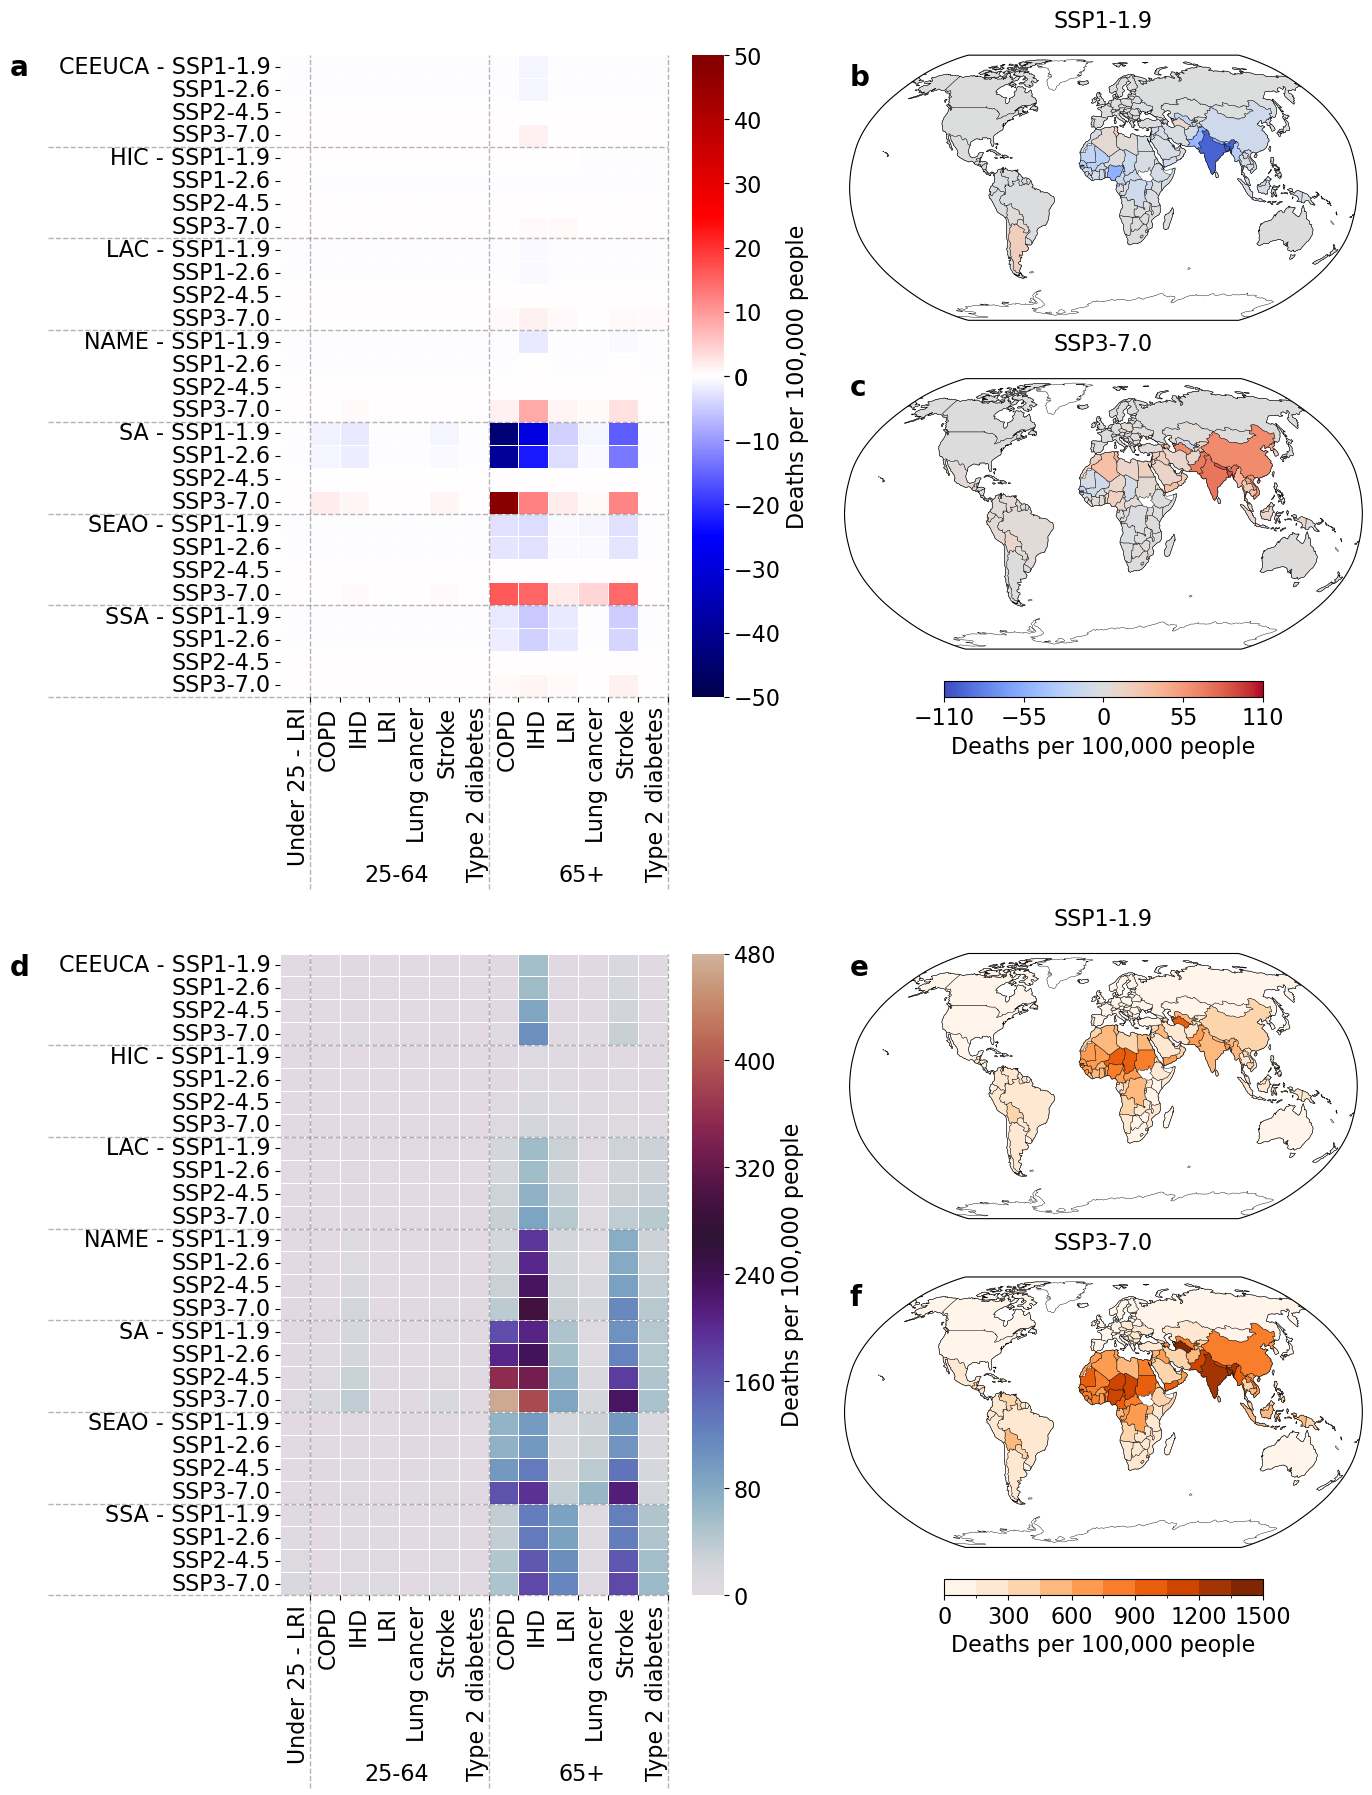

In [ ]:
from collections import OrderedDict
import seaborn as sns
import matplotlib as mpl
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import TwoSlopeNorm
import cartopy.crs as ccrs

twilight_cmap = plt.cm.twilight
cropped_cmap = mcolors.LinearSegmentedColormap.from_list(
    "cropped_twilight", twilight_cmap(np.linspace(0, 0.9, 256))
)

heatmap_data_1 = death_rate_diff_both[
    (death_rate_diff_both['age_group'] != 'Under 25') |  
    ((death_rate_diff_both['age_group'] == 'Under 25') & (death_rate_diff_both['Disease'] == 'LRI'))
].pivot_table(
    index=['GBD Region', 'Scenario'],
    columns=['age_group', 'Disease'],
    values='weighted_death_rate_diff'
)

heatmap_data_2 = death_rate_adjusted_both[
    (death_rate_adjusted_both['age_group'] != 'Under 25') |  
    ((death_rate_adjusted_both['age_group'] == 'Under 25') & (death_rate_adjusted_both['Disease'] == 'LRI'))
].pivot_table(
    index=['GBD Region', 'Scenario'],
    columns=['age_group', 'Disease'],
    values='weighted_death_rate_adjusted'
)

fig = plt.figure(figsize=(20, 20))
gs = GridSpec(2, 2, width_ratios=[1, 3], height_ratios=[1, 1], wspace=-0.4, hspace=0.4)

gs_maps1 = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0, 1], height_ratios=[1,1.2],hspace=0.2)
gs_maps2 = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1, 1], height_ratios=[1,1.2], hspace=0.2)

ax_heatmap1 = fig.add_subplot(gs[0, 0])  
ax_map1_top = fig.add_subplot(gs_maps1[0, 0], projection=ccrs.Robinson())    
ax_map1_bottom = fig.add_subplot(gs_maps1[1, 0], projection=ccrs.Robinson()) 

ax_heatmap2 = fig.add_subplot(gs[1, 0]) 
ax_map2_top = fig.add_subplot(gs_maps2[0, 0], projection=ccrs.Robinson())    
ax_map2_bottom = fig.add_subplot(gs_maps2[1, 0], projection=ccrs.Robinson()) 

sns.heatmap(
    heatmap_data_1, ax=ax_heatmap1,
    cmap='seismic', linewidths=0.5,
    cbar_kws={'label': 'Deaths per 100,000'},
    center=0, vmin=-50, vmax=50
)

ax_heatmap1.set_xlabel("")
ax_heatmap1.set_ylabel("")
cbar1 = ax_heatmap1.collections[0].colorbar
cbar1.ax.set_ylabel('Deaths per 100,000 people', fontsize=16)
cbar1.set_ticks(np.arange(-50, 51, 10).tolist()+[0])
cbar1.ax.tick_params(labelsize=16)

sns.heatmap(
    heatmap_data_2, ax=ax_heatmap2,
    cmap=cropped_cmap, linewidths=0.5,
    cbar_kws={'label': 'Deaths per 100,000'},
    vmin=0, vmax=480
)

ax_heatmap2.set_xlabel("")
ax_heatmap2.set_ylabel("")
cbar2 = ax_heatmap2.collections[0].colorbar
cbar2.ax.set_ylabel('Deaths per 100,000 people', fontsize=16)
cbar2.set_ticks(np.arange(0, 480, 80).tolist()+[480])
cbar2.ax.tick_params(labelsize=16)


for ax, heatmap_data in zip([ax_heatmap1, ax_heatmap2], [heatmap_data_1, heatmap_data_2]):

    ylabel_mapping = OrderedDict()
    for scenario, region in heatmap_data.index:
        ylabel_mapping.setdefault(scenario, [])
        ylabel_mapping[scenario].append(region)

    hline_positions = []
    new_ylabels = []
    for scenario, regions in ylabel_mapping.items():
        regions[0] = f"{scenario} - {regions[0]}"
        new_ylabels.extend(regions)
        if hline_positions:
            hline_positions.append(len(regions) + hline_positions[-1])
        else:
            hline_positions.append(len(regions))
    
    ax.set_yticklabels(new_ylabels, fontsize=16, rotation=0)


    xlabel_mapping = OrderedDict()
    for age_group, disease in heatmap_data.columns:
        xlabel_mapping.setdefault(age_group, [])
        xlabel_mapping[age_group].append(disease)

    vline_positions = []
    new_xlabels = []
    for age_group, diseases in xlabel_mapping.items():
        if age_group == 'Under 25':
            diseases[0] = f"{age_group} - {diseases[0]}"
        else:
            diseases[0] = f"{diseases[0]}"
        new_xlabels.extend(diseases)
        if vline_positions:
            vline_positions.append(len(diseases) + vline_positions[-1])
        else:
            vline_positions.append(len(diseases))
    

    original_xticks = np.arange(len(new_xlabels))
    shifted_xticks = original_xticks + 1 
    ax.set_xticks(shifted_xticks)
    ax.set_xticklabels(new_xlabels, fontsize=16, rotation=90, ha="right")


    for h in hline_positions:
        ax.axhline(h, xmin=-0.6, xmax=1, color="black", linestyle='--', linewidth=1, alpha=0.3, clip_on=False)

    for v in vline_positions:
        ax.axvline(v, ymin=-0.3, ymax=1, color="black", linestyle='--', linewidth=1, alpha=0.3, clip_on=False)


plot_global_map(death_rate_diff_iso_both, 'SSP1-1.9', ax=ax_map1_top)
plot_global_map(death_rate_diff_iso_both, 'SSP3-7.0', ax=ax_map1_bottom)

plot_global_map_DR(death_rate_adjusted_iso_both, 'SSP1-1.9', ax=ax_map2_top)
plot_global_map_DR(death_rate_adjusted_iso_both, 'SSP3-7.0', ax=ax_map2_bottom)

fig.text(-0.01, 0.87, 'a', transform=fig.transFigure, fontsize=20, weight='bold')
fig.text(0.41, 0.865, 'b', transform=fig.transFigure, fontsize=20, weight='bold')
fig.text(0.41, 0.71, 'c', transform=fig.transFigure, fontsize=20, weight='bold')
ax_heatmap1.text(0.3, -0.26, '25-64', transform=ax_heatmap1.transAxes, fontsize=16, va='top', ha='center')
ax_heatmap1.text(0.78, -0.26, '65+', transform=ax_heatmap1.transAxes, fontsize=16, va='top', ha='center')

fig.text(-0.01, 0.42, 'd', transform=fig.transFigure, fontsize=20, weight='bold')
fig.text(0.41, 0.42, 'e', transform=fig.transFigure, fontsize=20, weight='bold')
fig.text(0.41, 0.255, 'f', transform=fig.transFigure, fontsize=20, weight='bold')
ax_heatmap2.text(0.3, -0.26, '25-64', transform=ax_heatmap2.transAxes, fontsize=16, va='top', ha='center')
ax_heatmap2.text(0.78, -0.26, '65+', transform=ax_heatmap2.transAxes, fontsize=16, va='top', ha='center')

plt.tight_layout()
plt.show()


# Figure S - death rate with sex categories

In [ ]:

death_rate_adjusted_sex = melted_df_adjusted[[
    'Scenario', 'Year', 'sex', 'GBD Region', 'age', 'age_group',
    'Population', 'Disease', 'Delta_Mortality_AVG'
]]


death_rate_adjusted_sex['death_rate_adjusted'] = np.where(
    (death_rate_adjusted_sex['Delta_Mortality_AVG'] == 0) & (death_rate_adjusted_sex['Population'] == 0),
    0,
    death_rate_adjusted_sex['Delta_Mortality_AVG'] / death_rate_adjusted_sex['Population'] * 1e5
)

death_rate_adjusted_sex = (
    death_rate_adjusted_sex.groupby(['Scenario', 'age_group', 'sex', 'GBD Region', 'Disease', 'Year'], as_index=False)
.apply(
        lambda group: pd.Series({
            'weighted_death_rate_adjusted': (group['death_rate_adjusted'] * group['Population']).sum() / group['Population'].sum()
        })
    )
    .reset_index()
)

death_rate_adjusted_sex = (
    death_rate_adjusted_sex.groupby(['Scenario', 'age_group', 'sex', 'GBD Region', 'Disease'], as_index=False)
    .agg(weighted_death_rate_adjusted=('weighted_death_rate_adjusted', 'mean'))
).replace({'sex': {'f': 'Female', 'm': 'Male'}})

region_map = {
    'Central Europe, eastern Europe, and central Asia': 'CEEUCA',
    'High income': 'HIC',
    'Latin America and Caribbean': 'LAC',
    'North Africa and Middle East': 'NAME',
    'South Asia': 'SA',
    'Southeast Asia, east Asia, and Oceania': 'SEAO',
    'Sub-Saharan Africa': 'SSA'
}
death_rate_adjusted_sex['GBD Region'] = death_rate_adjusted_sex['GBD Region'].replace(region_map)

disease_map = {
    'COP': 'COPD',
    'LUN': 'Lung cancer',
    'TDM': 'Type 2 diabetes',
    'STR': 'Stroke'
}

death_rate_adjusted_sex['Disease'] = death_rate_adjusted_sex['Disease'].replace(disease_map)


death_rate_adjusted_sex


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38736/1810496815.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_rate_adjusted_sex['death_rate_adjusted'] = np.where(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38736/1810496815.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate_adjusted_sex.groupby(['Scenario', 'age_group', 'sex', 'GBD Region', 'Disease', 'Year'], as_index=False)
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38736/1810496815.py:17: DeprecationWarning: DataFrameGroupBy.apply operate

,Scenario,age_group,sex,GBD Region,Disease,weighted_death_rate_adjusted
0,SSP1-1.9,Under 25,Female,CEEUCA,COPD,0.000000
1,SSP1-1.9,Under 25,Female,CEEUCA,IHD,0.000000
2,SSP1-1.9,Under 25,Female,CEEUCA,LRI,0.536639
3,SSP1-1.9,Under 25,Female,CEEUCA,Lung cancer,0.000000
4,SSP1-1.9,Under 25,Female,CEEUCA,Stroke,0.000000
...,...,...,...,...,...,...
1003,SSP3-7.0,65+,Male,SSA,IHD,185.811451
1004,SSP3-7.0,65+,Male,SSA,LRI,134.128256
1005,SSP3-7.0,65+,Male,SSA,Lung cancer,13.385296
1006,SSP3-7.0,65+,Male,SSA,Stroke,179.244372


In [ ]:

death_rate_diff_sex = melted_df_diff[[
    'Scenario', 'Year', 'sex', 'GBD Region', 'age', 'age_group',
    'Population', 'Disease', 'Delta_Mortality_Diff_AVG'
]]


death_rate_diff_sex['death_rate_diff'] = np.where(
    (death_rate_diff_sex['Delta_Mortality_Diff_AVG'] == 0) & (death_rate_diff_sex['Population'] == 0),
    0,
    death_rate_diff_sex['Delta_Mortality_Diff_AVG'] / death_rate_diff_sex['Population'] * 1e5
)


death_rate_diff_sex = (
    death_rate_diff_sex.groupby(['Scenario', 'age_group', 'sex', 'GBD Region', 'Disease', 'Year'], as_index=False)
.apply(
        lambda group: pd.Series({
            'weighted_death_rate_diff': (group['death_rate_diff'] * group['Population']).sum() / group['Population'].sum()
        })
    )
    .reset_index()
)

death_rate_diff_sex = (
    death_rate_diff_sex.groupby(['Scenario', 'age_group', 'sex', 'GBD Region', 'Disease'], as_index=False)
    .agg(weighted_death_rate_diff=('weighted_death_rate_diff', 'mean'))
).replace({'sex': {'f': 'Female', 'm': 'Male'}})

region_map = {
    'Central Europe, eastern Europe, and central Asia': 'CEEUCA',
    'High income': 'HIC',
    'Latin America and Caribbean': 'LAC',
    'North Africa and Middle East': 'NAME',
    'South Asia': 'SA',
    'Southeast Asia, east Asia, and Oceania': 'SEAO',
    'Sub-Saharan Africa': 'SSA'
}
death_rate_diff_sex['GBD Region'] = death_rate_diff_sex['GBD Region'].replace(region_map)

disease_map = {
    'COP': 'COPD',
    'LUN': 'Lung cancer',
    'TDM': 'Type 2 diabetes',
    'STR': 'Stroke'
}

death_rate_diff_sex['Disease'] = death_rate_diff_sex['Disease'].replace(disease_map)


death_rate_diff_sex

/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38736/82293543.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_rate_diff_sex['death_rate_diff'] = np.where(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38736/82293543.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate_diff_sex.groupby(['Scenario', 'age_group', 'sex', 'GBD Region', 'Disease', 'Year'], as_index=False)
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38736/82293543.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping 

,Scenario,age_group,sex,GBD Region,Disease,weighted_death_rate_diff
0,SSP1-1.9,Under 25,Female,CEEUCA,COPD,0.000000
1,SSP1-1.9,Under 25,Female,CEEUCA,IHD,0.000000
2,SSP1-1.9,Under 25,Female,CEEUCA,LRI,-0.007130
3,SSP1-1.9,Under 25,Female,CEEUCA,Lung cancer,0.000000
4,SSP1-1.9,Under 25,Female,CEEUCA,Stroke,0.000000
...,...,...,...,...,...,...
1003,SSP3-7.0,65+,Male,SSA,IHD,1.245063
1004,SSP3-7.0,65+,Male,SSA,LRI,0.418239
1005,SSP3-7.0,65+,Male,SSA,Lung cancer,0.034161
1006,SSP3-7.0,65+,Male,SSA,Stroke,1.390515


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38736/1593844028.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ].pivot_table(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_38736/1593844028.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ].pivot_table(


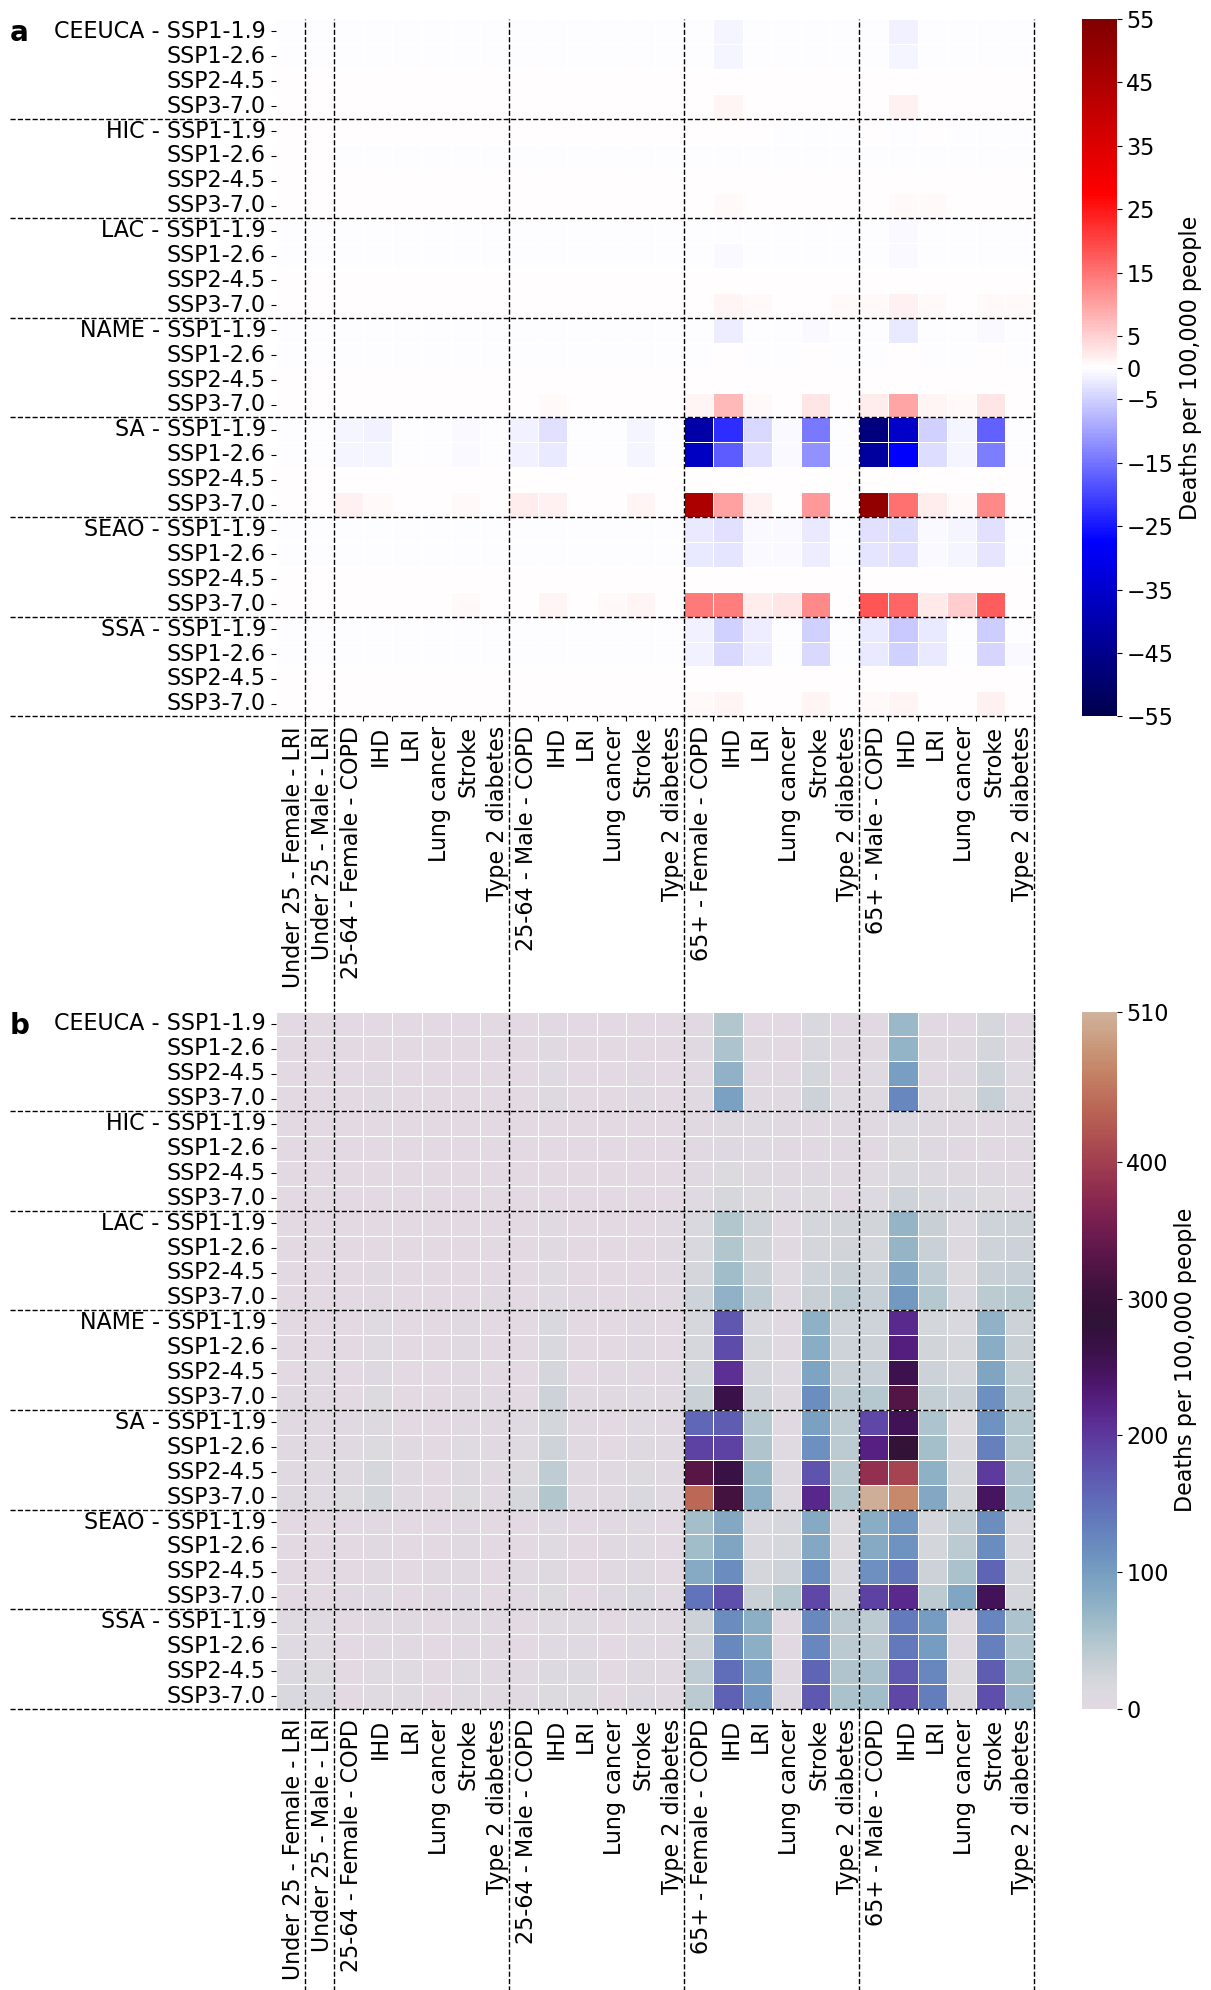

In [ ]:
twilight_cmap = plt.cm.twilight
cropped_cmap = mcolors.LinearSegmentedColormap.from_list(
    "cropped_twilight", twilight_cmap(np.linspace(0, 0.9, 256))
)

# === Pivot Data ===
heatmap_data_2 = death_rate_adjusted_sex[
    (death_rate_adjusted_sex['age_group'] != 'Under 25') |  
    ((death_rate_adjusted_sex['age_group'] == 'Under 25') & (death_rate_adjusted_sex['Disease'] == 'LRI'))
].pivot_table(
    index=['GBD Region', 'Scenario'],
    columns=['age_group', 'sex', 'Disease'],
    values='weighted_death_rate_adjusted'
)

heatmap_data_1 = death_rate_diff_sex[
    (death_rate_diff_sex['age_group'] != 'Under 25') |  
    ((death_rate_diff_sex['age_group'] == 'Under 25') & (death_rate_diff_sex['Disease'] == 'LRI'))
].pivot_table(
    index=['GBD Region', 'Scenario'],
    columns=['age_group', 'sex', 'Disease'],
    values='weighted_death_rate_diff'
)

fig, axes = plt.subplots(2,1, figsize=(12, 20))  

ax2 = sns.heatmap(
    heatmap_data_2, ax=axes[1],
    cmap=cropped_cmap, linewidths=0.5,
    cbar_kws={'label': 'Deaths per 100,000'},
    vmin=0, vmax=510
)

ax2.set_xlabel("")
ax2.set_ylabel("")
cbar2 = ax2.collections[0].colorbar
cbar2.ax.set_ylabel('Deaths per 100,000 people', fontsize=16)
cbar2.set_ticks(np.arange(0, 499, 100).tolist()+[510])
cbar2.ax.tick_params(labelsize=16)

ax1 = sns.heatmap(
    heatmap_data_1, ax=axes[0],
    cmap='seismic', linewidths=0.5,
    cbar_kws={'label': 'Deaths per 100,000'},
    center=0, vmin=-55, vmax=55
)

ax1.set_xlabel("")
ax1.set_ylabel("")
cbar1 = ax1.collections[0].colorbar
cbar1.ax.set_ylabel('Deaths per 100,000 people', fontsize=16)
cbar1.set_ticks(np.arange(-55, 56, 10).tolist()+[0])
cbar1.ax.tick_params(labelsize=16)

for ax, heatmap_data in zip([ax1, ax2], [heatmap_data_1, heatmap_data_2]):

    ylabel_mapping = OrderedDict()
    for scenario, region in heatmap_data.index:
        ylabel_mapping.setdefault(scenario, [])
        ylabel_mapping[scenario].append(region)

    hline_positions = []
    new_ylabels = []
    for scenario, regions in ylabel_mapping.items():
        regions[0] = f"{scenario} - {regions[0]}"
        new_ylabels.extend(regions)
        if hline_positions:
            hline_positions.append(len(regions) + hline_positions[-1])
        else:
            hline_positions.append(len(regions))
    

    ax.set_yticklabels(new_ylabels, fontsize=16, rotation=0)


    xlabel_mapping = OrderedDict()
    for age_group, sex, disease in heatmap_data.columns:
        xlabel_mapping.setdefault((age_group, sex), [])
        xlabel_mapping[(age_group, sex)].append(disease)

    vline_positions = []
    new_xlabels = []
    for (age_group, sex), diseases in xlabel_mapping.items():
        diseases[0] = f"{age_group} - {sex} - {diseases[0]}"
        new_xlabels.extend(diseases)
        if vline_positions:
            vline_positions.append(len(diseases) + vline_positions[-1])
        else:
            vline_positions.append(len(diseases))

    original_xticks = np.arange(len(new_xlabels))
    shifted_xticks = original_xticks + 1 
    ax.set_xticks(shifted_xticks)
    ax.set_xticklabels(new_xlabels, fontsize=16, rotation=90, ha="right")

    for h in hline_positions:
     ax.axhline(h, xmin=-0.35, xmax=1, color="black", linestyle='--', linewidth=1, clip_on=False)

    for v in vline_positions:
     ax.axvline(v, ymin=-0.5, ymax=1, color="black", linestyle='--', linewidth=1, clip_on=False)

fig.text(-0.35, 1, 'a', transform=axes[0].transAxes,fontsize=20, weight='bold', va='top', ha='left')
fig.text(-0.35, 1, 'b', transform=axes[1].transAxes,fontsize=20, weight='bold', va='top', ha='left')

plt.tight_layout()
plt.show()
